# Using Machine Learning Tools 2021, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore over-fitting and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled data of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (including all models and hyperparameter settings that you consider).  

The clients have asked to be informed about the following:
 - **unbiased accuracy** estimate of a deep learning model (since DL models are fast when deployed)
 - the letter with the lowest individual accuracy
 - the most common error (of one letter being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data, checking it, fixing any problems, and displaying a sample
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best one, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly what networks you have tried, the method you used to optimise them, the associated learning curves, their summary performance and selection process to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - a statistical test between the best and second-best models, to see if there is any significant difference in performance (overall accuracy)
 - it is hoped that the accuracy will exceed 96% overall and better than 90% for every individual letter, and you are asked to:
     - report the overall accuracy
     - report the accuracy for each individual letter
     - write a short recommendation regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps, as you've used in other assignments and workshops.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing, beyond the code, comments and the small amount that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (short summaries often help here), and include a few small markdown cells that describe or summarise things when necessary.

Marks for the assignment will be determined according to the general rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 10%: Loading, investigating, manipulating and displaying data
 - 20%: Initial model successfully trained (and acting as a baseline)
 - 45%: Optimisation of an appropriate set of models in an appropriate way (given the constraint of 50 training runs)
 - 25%: Comparison of models, selection of the best two and reporting of final results

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments. The one exception to this is the statistical test, which will be covered in week 11.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis. 
- Your code must use the current stable versions of python libraries, not outdated versions.
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code, so that its purpose is clear to the reader!
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib and keras, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

The assignment is worth 35% of your overall mark for the course.

Mark Jenkinson  
May 2022

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop

# Load the data

See shapes of each data sets.

In [2]:
num_letter = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
}

letter_num = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'K': 9,
    'L': 10,
    'M': 11,
    'N': 12,
    'O': 13,
    'P': 14,
    'Q': 15,
    'R': 16,
    'S': 17,
    'T': 18,
    'U': 19,
    'V': 20,
    'W': 21,
    'X': 22,
    'Y': 23,
}

In [3]:
# load the dataset
train_data = pd.read_csv('/Users/malujie/Machine-learning/A3/sign_mnist_train.csv')
test_data = pd.read_csv('/Users/malujie/Machine-learning/A3/sign_mnist_test.csv')
# print(train_data.describe())
# print(test_data.describe)
# print(train_data.shape)
# print(test_data.shape)

# define train set
X_train = train_data.drop(labels=['label'], axis=1)
Y_train = train_data['label']
# print(X_train.shape)
# print(Y_train.shape)

# define test set
X_test = test_data.drop(labels=['label'], axis=1)
Y_test = test_data['label']
# print(X_test.shape)
# print(Y_test.shape)

In [4]:
X_train = X_train[Y_train != 200]
Y_train = Y_train[Y_train != 200]

In [5]:
# change Y_train value
Y_train1 = []
for i in Y_train:
    Y_train1.append(letter_num.get(num_letter.get(i)))
    
Y_test1 = []
for i in Y_test:
    Y_test1.append(letter_num.get(num_letter.get(i)))
    
Y_train = np.array(Y_train1)
Y_test = np.array(Y_test1)

In [6]:
# reshape the data
X_test = np.array(X_test).reshape(-1, 28, 28)
X_train =  np.array(X_train).reshape(-1, 28, 28)
print(X_test.shape)
print(X_train.shape)

(7172, 28, 28)
(27454, 28, 28)


Use test function to test if there has a problem in datasets.

In [7]:
# new shape of X_train and Y_train
print(X_train.shape)
print(Y_train.shape)

(27454, 28, 28)
(27454,)


Show one example here.

Letter: D


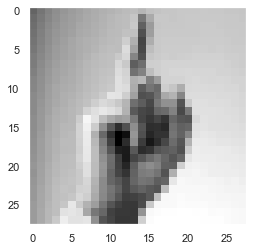

In [8]:
X_train = X_train/255
X_val, Y_val = X_test[:5000]/255, Y_test[:5000]

# print(X_val.dtype)
# print(X_train.dtype)

print("Letter:", num_letter[Y_train[0]])
plt.imshow(X_train[0,:,:], cmap='gray')
plt.grid(False)
plt.show()

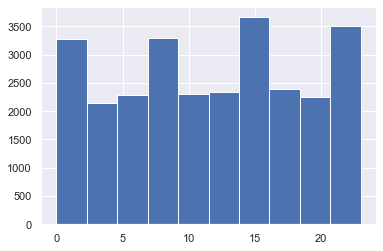

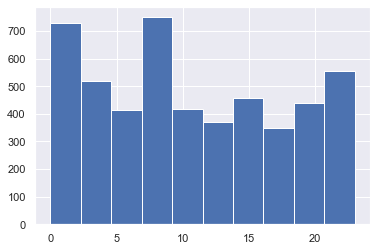

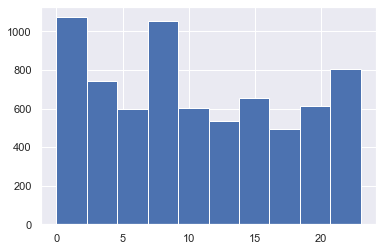

In [9]:
plt.hist(Y_train)
plt.show()
plt.hist(Y_val)
plt.show()
plt.hist(Y_test)
plt.show()

# Models

In [10]:
# Base
n_train = 27455
n_valid = 5000

hiddensizes = [16, 32, 16]

actfn = "elu"

optimizer = keras.optimizers.SGD
learningrate = 0.01   

batch_size = 32
n_epochs = 10

In [11]:
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=2))          
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  
        model.add(keras.layers.MaxPooling2D(pool_size=2))          
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  
    model.add(keras.layers.Flatten())                          
    model.add(keras.layers.Dense(24, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

In [12]:
def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28, 28, 1]))    # always have same sized inputs
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
    model.add(keras.layers.Dense(24, activation = "softmax"))   # always have 10 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [13]:
# Reshape the data to be shape [Nx, Ny, 1]  (previously 2D was fine, but for CNN we need depth too)
X_train = X_train.reshape((-1, 28, 28, 1))
X_valid = X_val.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [14]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) 

In [15]:
# CNN
def do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train[:n_train,:,:,:], Y_train[:n_train], epochs=n_epochs, callbacks = callbacks, 
                        validation_data=(X_valid[:n_valid,:,:,:], Y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [16]:
valacc, history, model = do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/10
858/858 [==============================] - 9s 10ms/step - loss: 2.8714 - accuracy: 0.1801 - val_loss: 2.1080 - val_accuracy: 0.3626
Epoch 2/10
858/858 [==============================] - 8s 10ms/step - loss: 1.2404 - accuracy: 0.6206 - val_loss: 1.0227 - val_accuracy: 0.6722
Epoch 3/10
858/858 [==============================] - 9s 10ms/step - loss: 0.5287 - accuracy: 0.8324 - val_loss: 0.7208 - val_accuracy: 0.7752
Epoch 4/10
858/858 [==============================] - 10s 11ms/step - loss: 0.2428 - accuracy: 0.9273 - val_loss: 0.6072 - val_accuracy: 0.8178
Epoch 5/10
858/858 [==============================] - 24s 28ms/step - loss: 0.1155 - accuracy: 0.9722 - val_loss: 0.5327 - val_accuracy: 0.8514
Epoch 6/10
858/858 [==============================] - 9s 10ms/step - loss: 0.0542 - accuracy: 0.9926 - val_loss: 0.5479 - val_accuracy: 0.8522
Epoch 7/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0289 - accuracy: 0.9975 - val_loss: 0.5370 - val_accuracy: 0.8

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 784)               0

In [18]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.xlabel('Epochs')
    plt.show() 

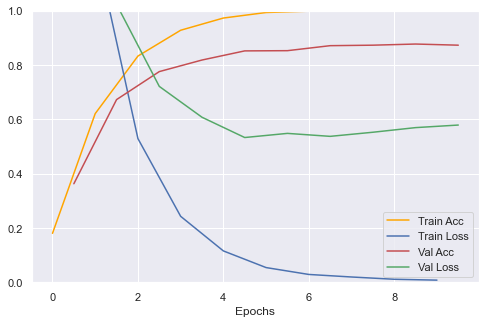

In [19]:
plot_history(history)

# Explore optimizer

Epoch 1/10
858/858 [==============================] - 9s 11ms/step - loss: 3.0102 - accuracy: 0.1493 - val_loss: 2.4251 - val_accuracy: 0.3250
Epoch 2/10
858/858 [==============================] - 10s 12ms/step - loss: 1.4353 - accuracy: 0.5741 - val_loss: 1.0516 - val_accuracy: 0.6856
Epoch 3/10
858/858 [==============================] - 9s 11ms/step - loss: 0.6138 - accuracy: 0.8077 - val_loss: 0.7539 - val_accuracy: 0.7538
Epoch 4/10
858/858 [==============================] - 9s 11ms/step - loss: 0.3010 - accuracy: 0.9083 - val_loss: 0.5963 - val_accuracy: 0.7794
Epoch 5/10
858/858 [==============================] - 11s 13ms/step - loss: 0.1494 - accuracy: 0.9601 - val_loss: 0.5304 - val_accuracy: 0.8352
Epoch 6/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0787 - accuracy: 0.9833 - val_loss: 0.4396 - val_accuracy: 0.8698
Epoch 7/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0418 - accuracy: 0.9946 - val_loss: 0.4309 - val_accuracy: 0.

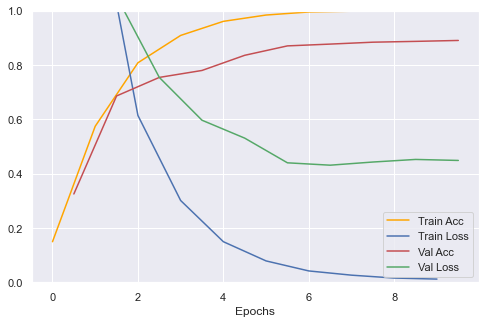

Epoch 1/10
858/858 [==============================] - 11s 12ms/step - loss: 0.5767 - accuracy: 0.8651 - val_loss: 2.9785 - val_accuracy: 0.8254
Epoch 2/10
858/858 [==============================] - 10s 12ms/step - loss: 0.4035 - accuracy: 0.9726 - val_loss: 6.5931 - val_accuracy: 0.8568
Epoch 3/10
858/858 [==============================] - 10s 12ms/step - loss: 0.3740 - accuracy: 0.9857 - val_loss: 9.2786 - val_accuracy: 0.8876
Epoch 4/10
858/858 [==============================] - 9s 11ms/step - loss: 0.4326 - accuracy: 0.9876 - val_loss: 17.4764 - val_accuracy: 0.8586
Epoch 5/10
858/858 [==============================] - 11s 13ms/step - loss: 0.5788 - accuracy: 0.9899 - val_loss: 15.2246 - val_accuracy: 0.9244
Epoch 6/10
858/858 [==============================] - 11s 12ms/step - loss: 0.4110 - accuracy: 0.9937 - val_loss: 22.8959 - val_accuracy: 0.8898
Epoch 7/10
858/858 [==============================] - 10s 12ms/step - loss: 0.9142 - accuracy: 0.9919 - val_loss: 27.0707 - val_accura

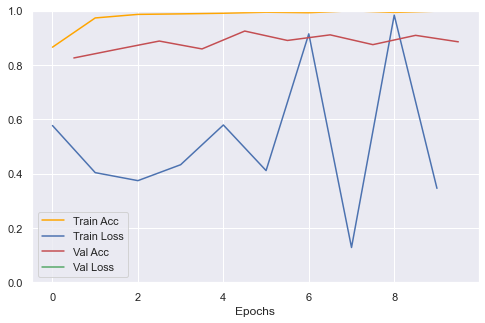

Epoch 1/10
858/858 [==============================] - 11s 12ms/step - loss: 19.6439 - accuracy: 0.6113 - val_loss: 8.3034 - val_accuracy: 0.0478
Epoch 2/10
858/858 [==============================] - 11s 13ms/step - loss: 6.2159 - accuracy: 0.0408 - val_loss: 5.0988 - val_accuracy: 0.0476
Epoch 3/10
858/858 [==============================] - 10s 11ms/step - loss: 5.8430 - accuracy: 0.0416 - val_loss: 5.7431 - val_accuracy: 0.0398
Epoch 4/10
858/858 [==============================] - 10s 12ms/step - loss: 5.6545 - accuracy: 0.0440 - val_loss: 6.2726 - val_accuracy: 0.0572
Epoch 5/10
858/858 [==============================] - 11s 13ms/step - loss: 4.6894 - accuracy: 0.1116 - val_loss: 4.1137 - val_accuracy: 0.1044
Epoch 6/10
858/858 [==============================] - 10s 12ms/step - loss: 1.4517 - accuracy: 0.6202 - val_loss: 1.0401 - val_accuracy: 0.7244
Epoch 7/10
858/858 [==============================] - 10s 12ms/step - loss: 0.2802 - accuracy: 0.9094 - val_loss: 1.2635 - val_accuracy

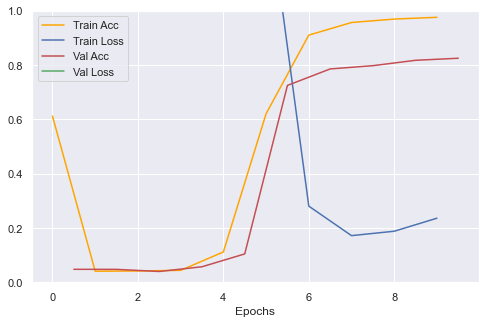

Epoch 1/10
858/858 [==============================] - 10s 11ms/step - loss: 0.8328 - accuracy: 0.8210 - val_loss: 1.4193 - val_accuracy: 0.8282
Epoch 2/10
858/858 [==============================] - 10s 11ms/step - loss: 0.1308 - accuracy: 0.9820 - val_loss: 4.2427 - val_accuracy: 0.8298
Epoch 3/10
858/858 [==============================] - 10s 12ms/step - loss: 0.1122 - accuracy: 0.9902 - val_loss: 4.5069 - val_accuracy: 0.8864
Epoch 4/10
858/858 [==============================] - 9s 10ms/step - loss: 0.1087 - accuracy: 0.9928 - val_loss: 5.8113 - val_accuracy: 0.8832
Epoch 5/10
858/858 [==============================] - 9s 11ms/step - loss: 0.0912 - accuracy: 0.9952 - val_loss: 7.1970 - val_accuracy: 0.8980
Epoch 6/10
858/858 [==============================] - 10s 11ms/step - loss: 0.1148 - accuracy: 0.9955 - val_loss: 8.0948 - val_accuracy: 0.9048
Epoch 7/10
858/858 [==============================] - 9s 11ms/step - loss: 0.0860 - accuracy: 0.9967 - val_loss: 13.5456 - val_accuracy: 0

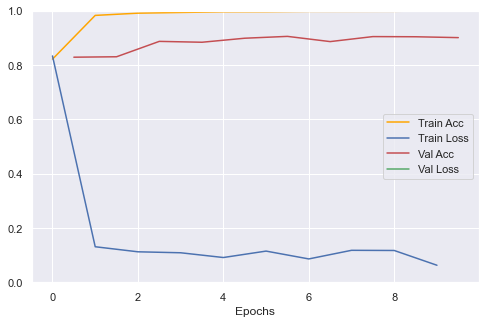

In [20]:
res=[]
for optimizer,lr in [[keras.optimizers.SGD,0.01], [keras.optimizers.Adam,0.01], [keras.optimizers.Nadam,0.01], [keras.optimizers.RMSprop, 0.01]  ]:
    valacc, history, discard = do_cnn(hiddensizes, actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[valacc]]

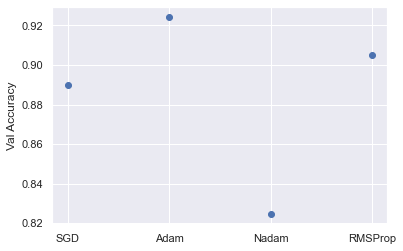

In [21]:
res=np.array(res)
plt.plot(res[:,0],'o')
plt.ylabel('Val Accuracy')
plt.xticks(ticks=[0,1,2,3],labels=['SGD','Adam','Nadam','RMSProp'])
plt.show()

# Explore learning rate


In [22]:
optimizer = keras.optimizers.Adam

Epoch 1/10
858/858 [==============================] - 10s 11ms/step - loss: 2.6263 - accuracy: 0.2756 - val_loss: 1.8081 - val_accuracy: 0.5050
Epoch 2/10
858/858 [==============================] - 9s 10ms/step - loss: 1.2837 - accuracy: 0.6349 - val_loss: 1.2059 - val_accuracy: 0.6276
Epoch 3/10
858/858 [==============================] - 8s 10ms/step - loss: 0.8297 - accuracy: 0.7647 - val_loss: 0.9808 - val_accuracy: 0.6840
Epoch 4/10
858/858 [==============================] - 8s 10ms/step - loss: 0.6006 - accuracy: 0.8291 - val_loss: 0.7970 - val_accuracy: 0.7382
Epoch 5/10
858/858 [==============================] - 17s 20ms/step - loss: 0.4556 - accuracy: 0.8676 - val_loss: 0.7090 - val_accuracy: 0.7696
Epoch 6/10
858/858 [==============================] - 12s 13ms/step - loss: 0.3511 - accuracy: 0.9003 - val_loss: 0.6273 - val_accuracy: 0.8050
Epoch 7/10
858/858 [==============================] - 10s 11ms/step - loss: 0.2727 - accuracy: 0.9242 - val_loss: 0.5823 - val_accuracy: 0.

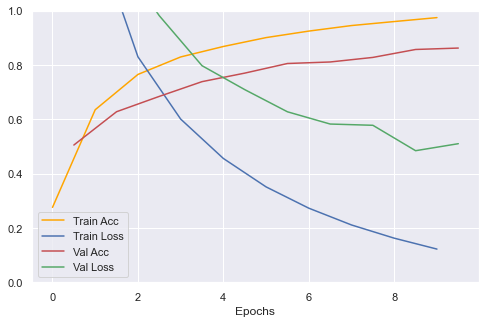

Epoch 1/10
858/858 [==============================] - 10s 11ms/step - loss: 1.2232 - accuracy: 0.6497 - val_loss: 0.6513 - val_accuracy: 0.7846
Epoch 2/10
858/858 [==============================] - 10s 12ms/step - loss: 0.2106 - accuracy: 0.9403 - val_loss: 0.4874 - val_accuracy: 0.8464
Epoch 3/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0607 - accuracy: 0.9879 - val_loss: 0.4923 - val_accuracy: 0.8640
Epoch 4/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0236 - accuracy: 0.9967 - val_loss: 0.4999 - val_accuracy: 0.8704
Epoch 5/10
858/858 [==============================] - 11s 12ms/step - loss: 0.0105 - accuracy: 0.9988 - val_loss: 0.5131 - val_accuracy: 0.8832
Epoch 6/10
858/858 [==============================] - 11s 13ms/step - loss: 0.0062 - accuracy: 0.9993 - val_loss: 0.5509 - val_accuracy: 0.8760
Epoch 7/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0130 - accuracy: 0.9968 - val_loss: 0.5224 - val_accuracy:

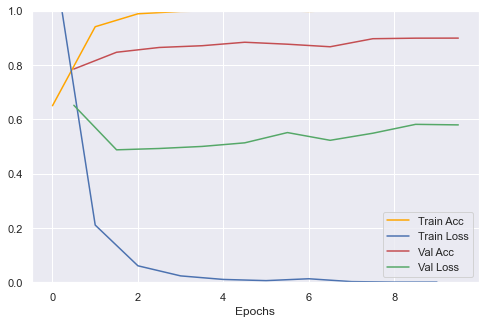

Epoch 1/10
858/858 [==============================] - 12s 13ms/step - loss: 0.7637 - accuracy: 0.7738 - val_loss: 0.4086 - val_accuracy: 0.8764
Epoch 2/10
858/858 [==============================] - 15s 18ms/step - loss: 0.0361 - accuracy: 0.9929 - val_loss: 0.3712 - val_accuracy: 0.9010
Epoch 3/10
858/858 [==============================] - 15s 18ms/step - loss: 0.0125 - accuracy: 0.9979 - val_loss: 0.3458 - val_accuracy: 0.9132
Epoch 4/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0083 - accuracy: 0.9984 - val_loss: 0.5728 - val_accuracy: 0.8496
Epoch 5/10
858/858 [==============================] - 10s 11ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.3887 - val_accuracy: 0.9234
Epoch 6/10
858/858 [==============================] - 10s 11ms/step - loss: 4.2725e-04 - accuracy: 1.0000 - val_loss: 0.3976 - val_accuracy: 0.9214
Epoch 7/10
858/858 [==============================] - 9s 11ms/step - loss: 2.5644e-04 - accuracy: 1.0000 - val_loss: 0.4369 - val_ac

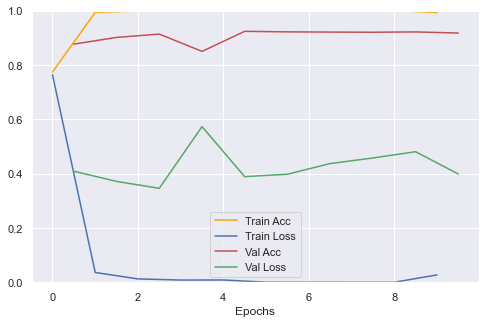

Epoch 1/10
858/858 [==============================] - 10s 12ms/step - loss: 0.3385 - accuracy: 0.8971 - val_loss: 0.5681 - val_accuracy: 0.8984
Epoch 2/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.5433 - val_accuracy: 0.9156
Epoch 3/10
858/858 [==============================] - 9s 11ms/step - loss: 1.1031e-04 - accuracy: 1.0000 - val_loss: 0.5783 - val_accuracy: 0.9174
Epoch 4/10
858/858 [==============================] - 9s 10ms/step - loss: 5.3127e-05 - accuracy: 1.0000 - val_loss: 0.6075 - val_accuracy: 0.9218
Epoch 5/10
858/858 [==============================] - 10s 12ms/step - loss: 2.9617e-05 - accuracy: 1.0000 - val_loss: 0.6304 - val_accuracy: 0.9206
Epoch 6/10
858/858 [==============================] - 10s 12ms/step - loss: 1.7449e-05 - accuracy: 1.0000 - val_loss: 0.6466 - val_accuracy: 0.9220
Epoch 7/10
858/858 [==============================] - 10s 12ms/step - loss: 1.0475e-05 - accuracy: 1.0000 - val_loss: 0.69

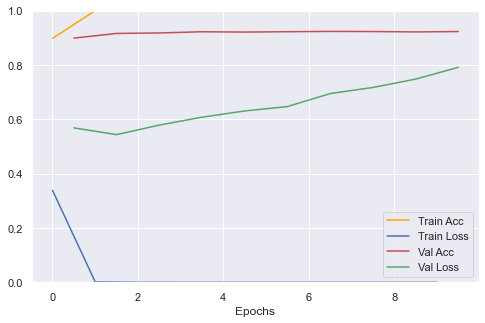

Epoch 1/10
858/858 [==============================] - 10s 11ms/step - loss: 0.6165 - accuracy: 0.8520 - val_loss: 2.4887 - val_accuracy: 0.8636
Epoch 2/10
858/858 [==============================] - 9s 11ms/step - loss: 0.2737 - accuracy: 0.9798 - val_loss: 5.6825 - val_accuracy: 0.7886
Epoch 3/10
858/858 [==============================] - 9s 11ms/step - loss: 0.5753 - accuracy: 0.9797 - val_loss: 7.8964 - val_accuracy: 0.8884
Epoch 4/10
858/858 [==============================] - 10s 11ms/step - loss: 0.3039 - accuracy: 0.9905 - val_loss: 12.7911 - val_accuracy: 0.8942
Epoch 5/10
858/858 [==============================] - 10s 11ms/step - loss: 0.5752 - accuracy: 0.9880 - val_loss: 18.6422 - val_accuracy: 0.8784
Epoch 6/10
858/858 [==============================] - 9s 11ms/step - loss: 0.4832 - accuracy: 0.9927 - val_loss: 22.2351 - val_accuracy: 0.9028
Epoch 7/10
858/858 [==============================] - 9s 10ms/step - loss: 0.4421 - accuracy: 0.9941 - val_loss: 32.6014 - val_accuracy:

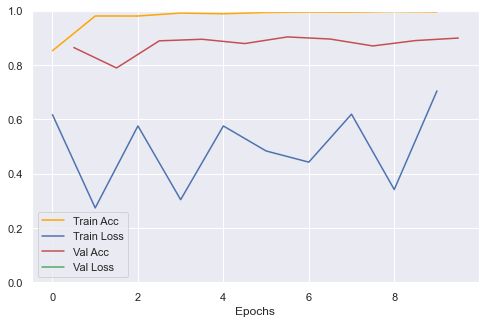

[[0.0001, 0.8618000149726868], [0.0005, 0.8984000086784363], [0.001, 0.9233999848365784], [0.005, 0.9229999780654907], [0.01, 0.9028000235557556]]


In [28]:
# Learning rate
res=[]
for lr in [0.01, 0.05, 0.1, 0.5, 1]:
    valacc, history, discard = do_cnn(hiddensizes, actfn, optimizer, lr*learningrate, n_train, n_valid, n_epochs, batch_size)
    print(f'Network configuration = {hiddensizes}')
    plot_history(history)
    res += [[lr*learningrate,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

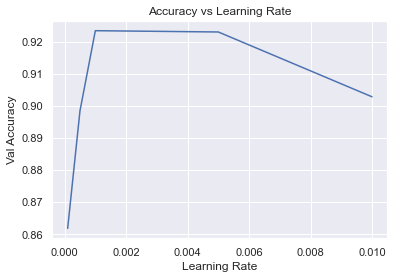

In [29]:
res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

# Explore the 